In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [16]:
# شبیه‌سازی داده‌ها اولیه
data = [
    {'سرعت قطار (km/h)': 55, 'شیب مسیر (درجه)': 6, 'وزن بار (تن)': 600, 'زمان سفر (ساعت)': 2, 'سن قطار (سال)': 10, 
     'تجربه راننده (سال)': 5, 'وضعیت نگهداری خط': 'متوسط', 'شرایط آب و هوایی': 'بارانی', 'نوع قطار': 'مسافری', 
     'وضعیت ترافیک ریلی': 'شلوغ', 'کیفیت سیگنال': 'ضعیف', 'وضعیت سیستم ترمز': 'خوب', 'میزان پیچ مسیر (درجه)': 8, 
     'فاصله بین ایستگاه‌ها (km)': 15, 'حادثه': 'خروج از ریل'},
    
    {'سرعت قطار (km/h)': 45, 'شیب مسیر (درجه)': 3, 'وزن بار (تن)': 300, 'زمان سفر (ساعت)': 1.5, 'سن قطار (سال)': 5, 
     'تجربه راننده (سال)': 10, 'وضعیت نگهداری خط': 'خوب', 'شرایط آب و هوایی': 'صاف', 'نوع قطار': 'باری', 
     'وضعیت ترافیک ریلی': 'خلوت', 'کیفیت سیگنال': 'خوب', 'وضعیت سیستم ترمز': 'متوسط', 'میزان پیچ مسیر (درجه)': 3, 
     'فاصله بین ایستگاه‌ها (km)': 30, 'حادثه': 'برخورد جزیی'},
    
    {'سرعت قطار (km/h)': 70, 'شیب مسیر (درجه)': 8, 'وزن بار (تن)': 700, 'زمان سفر (ساعت)': 3, 'سن قطار (سال)': 15, 
     'تجربه راننده (سال)': 12, 'وضعیت نگهداری خط': 'ضعیف', 'شرایط آب و هوایی': 'مه آلود', 'نوع قطار': 'مسافری', 
     'وضعیت ترافیک ریلی': 'شلوغ', 'کیفیت سیگنال': 'ضعیف', 'وضعیت سیستم ترمز': 'خوب', 'میزان پیچ مسیر (درجه)': 5, 
     'فاصله بین ایستگاه‌ها (km)': 25, 'حادثه': 'واژگونی'}
]

# تبدیل داده‌ها به DataFrame
df = pd.DataFrame(data)

# برای شبیه‌سازی 2000 نمونه، داده‌ها را گسترش می‌دهیم
df_expanded = pd.concat([df] * 667, ignore_index=True)  # 3 * 667 = 2001

# ایجاد تغییرات تصادفی در مقادیر برای تنوع بیشتر
np.random.seed(42)
df_expanded['سرعت قطار (km/h)'] += np.random.randint(-10, 10, size=len(df_expanded))
df_expanded['شیب مسیر (درجه)'] += np.random.randint(-2, 2, size=len(df_expanded))
df_expanded['وزن بار (تن)'] += np.random.randint(-100, 100, size=len(df_expanded))
df_expanded['زمان سفر (ساعت)'] += np.random.uniform(-0.5, 0.5, size=len(df_expanded))
df_expanded['سن قطار (سال)'] += np.random.randint(-3, 3, size=len(df_expanded))
df_expanded['تجربه راننده (سال)'] += np.random.randint(-1, 2, size=len(df_expanded))
df_expanded['میزان پیچ مسیر (درجه)'] += np.random.randint(-2, 2, size=len(df_expanded))
df_expanded['فاصله بین ایستگاه‌ها (km)'] += np.random.randint(-5, 5, size=len(df_expanded))

# نمایش نمونه‌ای از دیتاست گسترش‌یافته
df_expanded.head()

,سرعت قطار (km/h),شیب مسیر (درجه),وزن بار (تن),زمان سفر (ساعت),سن قطار (سال),تجربه راننده (سال),وضعیت نگهداری خط,شرایط آب و هوایی,نوع قطار,وضعیت ترافیک ریلی,کیفیت سیگنال,وضعیت سیستم ترمز,میزان پیچ مسیر (درجه),فاصله بین ایستگاه‌ها (km),حادثه
0,51,7,550,2.384355,7,4,متوسط,بارانی,مسافری,شلوغ,ضعیف,خوب,7,19,خروج از ریل
1,54,2,340,1.559405,6,9,خوب,صاف,باری,خلوت,خوب,متوسط,4,27,برخورد جزیی
2,74,9,682,3.328488,13,11,ضعیف,مه آلود,مسافری,شلوغ,ضعیف,خوب,3,29,واژگونی
3,55,5,676,2.212846,9,6,متوسط,بارانی,مسافری,شلوغ,ضعیف,خوب,6,14,خروج از ریل
4,42,4,397,1.696695,3,10,خوب,صاف,باری,خلوت,خوب,متوسط,4,30,برخورد جزیی


In [17]:
# تبدیل ویژگی‌های کیفی به مقادیر عددی
label_encoders = {}
for column in ['وضعیت نگهداری خط', 'شرایط آب و هوایی', 'نوع قطار', 'وضعیت ترافیک ریلی', 'کیفیت سیگنال', 'وضعیت سیستم ترمز']:
    le = LabelEncoder()
    df_expanded[column] = le.fit_transform(df_expanded[column])
    label_encoders[column] = le

# تبدیل متغیر هدف (حادثه) به مقادیر عددی
df_expanded['حادثه'] = df_expanded['حادثه'].map({'خروج از ریل': 0, 'واژگونی': 1, 'برخورد جزیی': 2})

# نمایش دیتاست بعد از تبدیل ویژگی‌ها
df_expanded.head()


,سرعت قطار (km/h),شیب مسیر (درجه),وزن بار (تن),زمان سفر (ساعت),سن قطار (سال),تجربه راننده (سال),وضعیت نگهداری خط,شرایط آب و هوایی,نوع قطار,وضعیت ترافیک ریلی,کیفیت سیگنال,وضعیت سیستم ترمز,میزان پیچ مسیر (درجه),فاصله بین ایستگاه‌ها (km),حادثه
0,51,7,550,2.384355,7,4,2,0,1,1,1,0,7,19,0
1,54,2,340,1.559405,6,9,0,1,0,0,0,1,4,27,2
2,74,9,682,3.328488,13,11,1,2,1,1,1,0,3,29,1
3,55,5,676,2.212846,9,6,2,0,1,1,1,0,6,14,0
4,42,4,397,1.696695,3,10,0,1,0,0,0,1,4,30,2


In [18]:
# نرمال‌سازی ویژگی‌های عددی
scaler = StandardScaler()
X_columns = ['سرعت قطار (km/h)', 'شیب مسیر (درجه)', 'وزن بار (تن)', 'زمان سفر (ساعت)', 
             'سن قطار (سال)', 'تجربه راننده (سال)', 'میزان پیچ مسیر (درجه)', 'فاصله بین ایستگاه‌ها (km)']

df_expanded[X_columns] = scaler.fit_transform(df_expanded[X_columns])

# ویژگی‌ها (X) و متغیر هدف (y)
X = df_expanded.drop('حادثه', axis=1)
y = df_expanded['حادثه']

# نمایش داده‌ها پس از نرمال‌سازی
X.head()

,سرعت قطار (km/h),شیب مسیر (درجه),وزن بار (تن),زمان سفر (ساعت),سن قطار (سال),تجربه راننده (سال),وضعیت نگهداری خط,شرایط آب و هوایی,نوع قطار,وضعیت ترافیک ریلی,کیفیت سیگنال,وضعیت سیستم ترمز,میزان پیچ مسیر (درجه),فاصله بین ایستگاه‌ها (km)
0,-0.414091,0.774099,0.081017,0.338616,-0.551529,-1.631418,2,0,1,1,1,0,0.926071,-0.562915
1,-0.162519,-1.348362,-1.100171,-0.871190,-0.777494,0.009513,0,1,0,0,0,1,-0.369781,0.601165
2,1.514634,1.623083,0.823478,1.723206,0.804257,0.665885,1,2,1,1,1,0,-0.801731,0.892185
3,-0.078661,-0.074885,0.789730,0.087094,-0.099601,-0.975046,2,0,1,1,1,0,0.494120,-1.290465
4,-1.168810,-0.499378,-0.779563,-0.669852,-1.455387,0.337699,0,1,0,0,0,1,-0.369781,1.037695


In [19]:
# استفاده از SMOTE برای تعادل کلاس‌ها
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# بررسی تعداد نمونه‌های هر کلاس پس از SMOTE
print("Resampled class distribution:", pd.Series(y_resampled).value_counts())

Resampled class distribution: حادثه
0    667
2    667
1    667
Name: count, dtype: int64


In [20]:
# تقسیم داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# نمایش اندازه‌های مجموعه‌های آموزش و تست
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (1600, 14)
Test data shape: (401, 14)


In [21]:
# ساخت مدل جنگل تصادفی
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# آموزش مدل
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# پیش‌بینی با داده‌های تست
y_pred_rf = rf_model.predict(X_test)

# ارزیابی دقت مدل
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest: {accuracy_rf * 100:.2f}%')

# گزارش کامل ارزیابی مدل با zero_division=1
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))

# نمایش ماتریس سردرگمی (Confusion Matrix)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy of Random Forest: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       123

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Confusion Matrix:
 [[134   0   0]
 [  0 144   0]
 [  0   0 123]]


In [23]:
from sklearn.model_selection import GridSearchCV

# تعریف هایپرپارامترهای مختلف برای جستجو
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# ساخت مدل جنگل تصادفی
rf_model = RandomForestClassifier(random_state=42)

# انجام جستجوی شبکه‌ای برای تنظیم هایپرپارامترها
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# آموزش مدل با استفاده از داده‌های آموزش
grid_search.fit(X_train, y_train)

# نمایش بهترین ترکیب هایپرپارامترها
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estim

/home/ranjer/Desktop/railproject/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
615 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ranjer/Desktop/railproject/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ranjer/Desktop/railproject/venv/lib/python3.12/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/home/ranjer/Desktop/railproject/venv/lib/python3.12/site-packages/sklearn/base.py", line 471, in _val

Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
# استفاده از بهترین مدل پیدا شده توسط GridSearchCV
best_rf_model = grid_search.best_estimator_

# پیش‌بینی با داده‌های تست
y_pred_rf_best = best_rf_model.predict(X_test)

# ارزیابی دقت مدل
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f'Accuracy of Random Forest after Hyperparameter Tuning: {accuracy_rf_best * 100:.2f}%')

# گزارش کامل ارزیابی مدل با zero_division=1
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best, zero_division=1))

# نمایش ماتریس سردرگمی (Confusion Matrix)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))

Accuracy of Random Forest after Hyperparameter Tuning: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       123

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Confusion Matrix:
 [[134   0   0]
 [  0 144   0]
 [  0   0 123]]


In [25]:
import joblib

# ذخیره مدل آموزش‌دیده
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

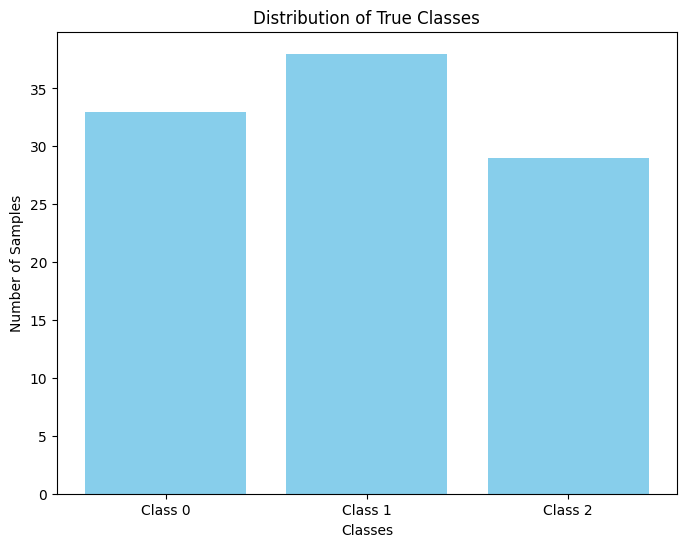

In [27]:
import matplotlib.pyplot as plt

# تعداد نمونه‌ها در هر کلاس
classes = ['Class 0', 'Class 1', 'Class 2']
class_counts = np.bincount(y_test)

# رسم نمودار میله‌ای
plt.figure(figsize=(8, 6))
plt.bar(classes, class_counts, color='skyblue')
plt.title('Distribution of True Classes')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()